## Student Project

In this notebook the following paper is replicated: M. Brückner and A. Ciccone (2011) "Rain and the Democratic Window of Opportunity", *Econometrica*, Vol. 79, pp. 923-947.

*Accessible in this [classroom](https://github.com/HumanCapitalAnalysis/student-project-maxschae)*.

In [1]:
#todo: use environment file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

%matplotlib inline

#### Story

The authors claim that temporary negative shocks to income cause institutions in sub-Saharan Africa to become more democratic. Accordingly, negative income shocks decrease the opportunity cost of contesting political power, and to retain stability and command the ruling regime will employ more democratic institutions. Since income per capita and institutions are likely to have unobserved common causes an instrumental variable approach is taken to isolate the variation in income that is exogenous. The instrument is rainfall which is assumed to cause variation in income per capita ($\rightarrow$ IV is relevant), whereas is not correlated with institutional scores (exogeneity assumption) and its only effect on institutions is through income (exclusive restriction assumption). Rainfall affects GDP per capita mainly by increasing the yield in agricultural production, for instance, droughts will have a negative impact on GDP per capita.

The story (and this notebook) unfolds along the two stages of the estimation framework. First, to isolate the exogenous variation in income per capita, GDP per capita is related to rainfall. In the second stage, democracy score(s) are then regressed on the clean variation in income. However, first data are introduced and the identification strategy is discussed in greater detail.

#### Data

Panel data: 41 sub-Saharan African countries between 1981 to 2004 (unbalanced) $-$ 955 observations

* Institutional scores available from the Polity IV Project (Center for Global Policy, George Mason University)

* Rainfall is taken from the National Aeronautics and Space Administration (NASA) Global Precipitation Climatology Project (GPCP)

* GDP per capita data come from the Penn World Table Version 6.2 (Center for International Comparisons of Production, Income and Prices, University of Pennsylvania)

In [2]:
def get_panel_datasets():
    dataset = "data/database.dta"
    df_initial = pd.read_stata(dataset)    
    index = list()
    for i in range(len(df_initial)):
        index.append((df_initial.iloc[i]['ccode'], df_initial.iloc[i]['year']))
    index = pd.MultiIndex.from_tuples(index, names=('country_index', 'year_index'))
    df_initial.index = index
    df = df_initial.dropna(axis=0, subset=['polity2'])
    return df, df_initial

df, df_initial = get_panel_datasets()

In [3]:
df.head()

country countryisocode  year  ccode  polity2  \
country_index year_index                                                       
404           1981        Guinea-Bissau            GNB  1981    404     -7.0   
              1982        Guinea-Bissau            GNB  1982    404     -7.0   
              1983        Guinea-Bissau            GNB  1983    404     -7.0   
              1984        Guinea-Bissau            GNB  1984    404     -8.0   
              1985        Guinea-Bissau            GNB  1985    404     -8.0   

                          polity2l  polity2l2  polity_d  polity  exconst  ...  \
country_index year_index                                                  ...   
404           1981            -7.0       -7.0       0.0      -7      3.0  ...   
              1982            -7.0       -7.0       0.0      -7      3.0  ...   
              1983            -7.0       -7.0       0.0      -7      3.0  ...   
              1984            -7.0       -7.0       0.0      -8      2.0  ...   
              1985            -8.0       -7.0       0.0      -8      2.0  ...   

                          dum_rain_10  dum_rain_20  agri_gdpshare  \
country_index year_index                                            
404           1981                  0            1      53.279999   
              1982                  1            1      46.770000   
              1983                  0            0      42.450001   
              1984                  0            0      41.320000   
              1985                  1            1      46.490002   

                          agri_gdp_av      gdp_l2    rain_mw_l   rain_mw_l3  \
country_index year_index                                                      
404           1981          53.743752  338.047333  1323.417725  1796.730103   
              1982          53.743752  313.258240  1711.137573  1343.365234   
              1983          53.743752  417.014160  1469.449951  1323.417725   
              1984          53.743752  409.886810  1342.599365  1711.137573   
              1985          53.743752  450.310425  1348.143433  1469.449951   

                           rain_mw_l4   rain_mw_l2      rain_mw  
country_index year_index                                         
404           1981        1222.450684  1343.365479  1711.137573  
              1982        1796.730103  1323.417969  1469.449951  
              1983        1343.365234  1711.137939  1342.599365  
              1984        1323.417725  1469.450073  1348.143433  
              1985        1711.137573  1342.599609  1400.806152  

[5 rows x 116 columns]

#### Identification Strategy

##### Motivation of IV approach <br>
...

##### Causal graph <br>
...

In [4]:
import pygraphviz as pgv
from IPython.display import Image

In [5]:
def get_graph():
    g = pgv.AGraph(size='12,7', ratio='fill', resolution='300', rankdir='LR', directed='true')    
    g.node_attr['width'] = '1.0'  
    g.node_attr['fontsize'] = '35'  
    g.edge_attr['penwidth'] = '1'
    g.node_attr['style']='filled'
    g.node_attr['fillcolor']='black'    
    return g

def wrapping_up(g, fname):
    g.draw(fname, prog="dot")
    return Image(fname)

In [6]:
g = get_graph()

g.add_node('Y', xlabel='Institutions')
g.add_node('D', xlabel='Income per capita')
g.add_node('Z', xlabel='Rainfall')
g.add_node('U', xlabel='Unobservables', fillcolor='white')
g.add_node('C', xlabel='Country')
g.add_node('T', xlabel='Year')

g.add_edge('D', 'Y')
g.add_edge('Z', 'D')
g.add_edge('U', 'D')
g.add_edge('U', 'Y')
g.add_edge('C', 'Y')
g.add_edge('C', 'D')
g.add_edge('T', 'Y')
g.add_edge('T', 'D')

wrapping_up(g, 'fig-observed-confounding-variable.png' )

OSError: Format: "png" not recognized. Use one of:


##### Threats to identification

* Violation exogeneity assumption <br>
If the instrument has a direct causal effect on the outcome, the researcher cannot recover the causal effect of interest. In terms of the causal graph, there exists an unblocked backdoor path from the treatment to the outcome through the instrument ($D \leftarrow Z \rightarrow Y$). A plausible direct effect may be given when institutions would become more democratic following the event of droughts. The call for democratic goverance of water resources has been made in Egypt and Tunisia for instance [SOURCE].

* Threats to exclusive restriction <br>
Identification of the causal effect of income shocks on democracy scores is not possible if the instrument has an indirect effect on democracy scores through an unobservable. The resulting backdoor path cannot be blocked and identifying the causal effect fails.

* Weak instrument problem <br>
**work here** It is required that the instrument indeed causes variation in the treatment variable. A weak correlation leads to trouble in the IV estimator. In this case: when agriculture / GDP share is small, negative rainfall shocks may not have large effects on GPD (per capita). First stage informs us, but heterogeneity in agriculture shares among countries

* A note on the interpretation of causal effect <br>
**work here** The identification of the causal effect of negative transitory income shocks on improvements of Polity scores is threatened if negative rainfall shocks affect Polity scores by decreasing citizens cost of contesting power not only through income but through other channels, too. The authors mention two potential channels. First, if road floodings vanish in aftermath of a drought, cost of transport and coordination of political protest would decrease. Second, Cekan (1993) finds evidence that young men are more likely to be sent to urban areas in times of drought which may decrease coordination cost of contesting power. In these cases, it is still possible to assess the impact of rainfall shocks on Polity scores but the interpretation of the causal effect does not withstand. That is, it cannot be argued that improvements in Polity scores are due to negative income shocks.

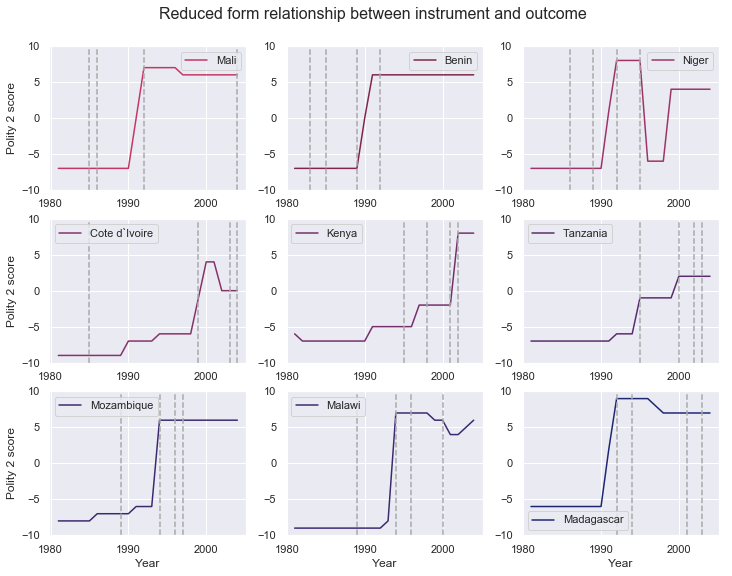

In [7]:
#todo: randomly draw countries to be shown?
sns.set()
colors = ['#c33764', '#7d2648', '#9d3367', '#863169', '#742f6a', '#592c6c', '#3c296e', '#3c296e', '#1d2671']
country_codes = [432, 434, 436, 437, 501, 510, 541, 553, 580]

fig = plt.figure(figsize=[12,9])
plt.suptitle('Reduced form relationship between instrument and outcome', y=0.94, fontsize=16)

for i,country_code in enumerate(country_codes):
    plt.subplot(3,3,i+1)
    plt.plot(df.loc[(country_code,), 'polity2'], color=colors[i], label=df.loc[(country_code,1981), 'country'])
    plt.ylim(bottom=df['polity2'].min(), top=10)
    plt.legend(loc='best')
    if i==0 or i==3 or i==6:
        plt.ylabel('Polity 2 score')
    if i==6 or i==7 or i==8:
        plt.xlabel('Year')
    
    subset = df.loc[(country_code,),:]
    subset = subset.loc[subset['dum_rain_20'] == 1]
    for yr in subset.index:
        plt.axvline(x=yr, ymin=0, ymax=1, color='#A9A9A9', linestyle='--')
        

#### Empirical Strategy